In [3]:
import numpy as np
import pandas as pd
import math
import cv2
import heapq
import os, glob
import matplotlib.pyplot as plt

def BrightnessDivision(img):
    bright = ''
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dim1 = np.array(img_gray).flatten()
        
    bins_list = [0, 25, 35, 80, 120, 150, 200, 240]
    hist, bins = np.histogram(dim1, bins_list)
    
    temp = hist.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(hist))

    dictionary = {}
    for i in range(0, len(hist)) :
        dictionary[ranks[i]] = hist[i]
    
#     print(hist)
#     print(ranks)
    # print(dictionary)

    #rank1 = np.max(ranks)
    rank1, rank2, rank3, rank4, rank5, rank6 = heapq.nlargest(6, ranks)
      
#     print(f'rank1 = {dictionary[rank1]}')
#     print(f'rank2 = {dictionary[rank2]}')
#     print(f'rank3 = {dictionary[rank3]}')
#     print(f'rank4 = {dictionary[rank4]}')
#     print(f'rank5 = {dictionary[rank5]}')
#     print(f'rank6 = {dictionary[rank6]}')
    
#     print("-----------------------------------")
    
#     print(f'hist1 = {hist[0]}')
#     print(f'hist2 = {hist[1]}')
#     print(f'hist3 = {hist[2]}')
#     print(f'hist4 = {hist[3]}')
#     print(f'hist5 = {hist[4]}')

    #percent = float(dictionary[rank3]/dictionary[rank4])
    correction_val = dictionary[rank1] / 5.2
    total_sum = np.sum(hist)
    
    if dictionary[rank1] == hist[3] or dictionary[rank1] == hist[4]:
        print("밝은 이미지")
        bright ="yes"
    elif dictionary[rank1] == hist[2] and dictionary[rank2] == hist[1]:
        if hist[1] <= hist[3] + 7000 :
            print("밝은 이미지")
            bright ="yes"
        else :
            print("어두운 이미지")
            bright ="no"
    elif dictionary[rank1] == hist[2] and correction_val < hist[3]:
        print("밝은 이미지 ")
        bright ="yes"
    else :
        print("어두운 이미지")
        bright ="no"
        
    return bright
        
#         if dictionary[rank1] == hist[2] :
#             if dictionary[rank2] == hist[3] and green2  < red2 :
#                 print("밝은 이미지")
#             elif hist[1] <= hist[3] + 7000 and red1 > green1:
#                 print("밝은 이미지")
#             else :
#                 print("어두운 이미지")
#         else :
#             print("어두운 이미지")

#     plt.subplot(6, 1, 2)
#     plt.title("GRAY")
#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     dim1 = np.array(img_gray).flatten()

#     hist_dataframe = pd.DataFrame(dim1)
      
#     bins_list = [0, 25, 35, 80, 120, 150, 200, 240]
#     hist_gray  = cv2.calcHist([img_gray], [0], None, [256], [0,256])
    
#     plt.hist(hist_dataframe.values, bins = bins_list)
#     plt.xticks(bins_list)

#     hist=np.int32(np.around(hist_gray))
    
#     # rgb
#     plt.subplot(6, 1, 1)
#     plt.title("RGB")
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     histColor = ('r','g','b')
#     for i in range(len(histColor)):
#         hist_rgb = cv2.calcHist(images=[img_rgb],channels=[i],mask=None, histSize=[256],ranges=[0,256])
#         plt.plot(hist_rgb,color=histColor[i])



In [34]:
data_dir = './data/nas_data'
FileList = glob.glob(data_dir + '/*.jpg')
img_namess = FileList
print(len(img_namess))
print(img_namess)


3478
['./data/nas_data\\FA0002_GW01_H01_0001_20211119075605_farm_image_real_7a101ec34a62.jpg', './data/nas_data\\FA0002_GW01_H01_0001_20211119080825_farm_image_real_2c9892b54620.jpg', './data/nas_data\\FA0002_GW01_H01_0001_20211119081826_farm_image_real_16d180d141dd.jpg', './data/nas_data\\FA0002_GW01_H01_0001_20211119081826_farm_image_real_16d180d141dd_weightPredictionResult.jpg', './data/nas_data\\FA0002_GW01_H01_0001_20211119082827_farm_image_real_5546a96f4454.jpg', './data/nas_data\\FA0002_GW01_H01_0001_20211119083838_farm_image_real_4c2e6da8413f.jpg', './data/nas_data\\FA0002_GW01_H01_0001_20211119083838_farm_image_real_4c2e6da8413f_weightPredictionResult.jpg', './data/nas_data\\FA0002_GW01_H01_0001_20211119084842_farm_image_real_5c599b2440ff.jpg', './data/nas_data\\FA0002_GW01_H01_0001_20211119084842_farm_image_real_5c599b2440ff_weightPredictionResult.jpg', './data/nas_data\\FA0002_GW01_H01_0001_20211119085847_farm_image_real_bf7d6eaa4070.jpg', './data/nas_data\\FA0002_GW01_H01_0

In [43]:
df = pd.DataFrame(columns=['org_file_name', 'bright'])

for idx, d in enumerate(img_namess):
    try :
        print(idx, d)
        index =  d.rfind('FA')
        
        im = cv2.imread(d, cv2.IMREAD_COLOR)
        if im is None : raise Exception('image not found')
        
        # plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        # plt.show()
        bright = BrightnessDivision(im)
        df.loc[idx] = [d[index : ], bright]
    except Exception as e :
        print(e)

0 ./data/nas_data\FA0002_GW01_H01_0001_20211119075605_farm_image_real_7a101ec34a62.jpg
어두운 이미지
1 ./data/nas_data\FA0002_GW01_H01_0001_20211119080825_farm_image_real_2c9892b54620.jpg
밝은 이미지 
2 ./data/nas_data\FA0002_GW01_H01_0001_20211119081826_farm_image_real_16d180d141dd.jpg
밝은 이미지 
3 ./data/nas_data\FA0002_GW01_H01_0001_20211119081826_farm_image_real_16d180d141dd_weightPredictionResult.jpg
밝은 이미지 
4 ./data/nas_data\FA0002_GW01_H01_0001_20211119082827_farm_image_real_5546a96f4454.jpg
밝은 이미지 
5 ./data/nas_data\FA0002_GW01_H01_0001_20211119083838_farm_image_real_4c2e6da8413f.jpg
밝은 이미지 
6 ./data/nas_data\FA0002_GW01_H01_0001_20211119083838_farm_image_real_4c2e6da8413f_weightPredictionResult.jpg
밝은 이미지 
7 ./data/nas_data\FA0002_GW01_H01_0001_20211119084842_farm_image_real_5c599b2440ff.jpg
밝은 이미지 
8 ./data/nas_data\FA0002_GW01_H01_0001_20211119084842_farm_image_real_5c599b2440ff_weightPredictionResult.jpg
밝은 이미지 
9 ./data/nas_data\FA0002_GW01_H01_0001_20211119085847_farm_image_real_bf7d6e

어두운 이미지
81 ./data/nas_data\FA0002_GW01_H01_0001_20211119152208_farm_image_real_7284a5604e3d_weightPredictionResult.jpg
어두운 이미지
82 ./data/nas_data\FA0002_GW01_H01_0001_20211119153213_farm_image_real_bf9a916440b8.jpg
어두운 이미지
83 ./data/nas_data\FA0002_GW01_H01_0001_20211119153213_farm_image_real_bf9a916440b8_weightPredictionResult.jpg
어두운 이미지
84 ./data/nas_data\FA0002_GW01_H01_0001_20211119154214_farm_image_real_9213d2ff4192.jpg
어두운 이미지
85 ./data/nas_data\FA0002_GW01_H01_0001_20211119154214_farm_image_real_9213d2ff4192_weightPredictionResult.jpg
어두운 이미지
86 ./data/nas_data\FA0002_GW01_H01_0001_20211119155214_farm_image_real_4893a8bb4e52.jpg
어두운 이미지
87 ./data/nas_data\FA0002_GW01_H01_0001_20211120075608_farm_image_real_7f77c8e2496a.jpg
어두운 이미지
88 ./data/nas_data\FA0002_GW01_H01_0001_20211120075608_farm_image_real_7f77c8e2496a_weightPredictionResult.jpg
어두운 이미지
89 ./data/nas_data\FA0002_GW01_H01_0001_20211120080613_farm_image_real_021e47aa4287.jpg
어두운 이미지
90 ./data/nas_data\FA0002_GW01_H01_0

어두운 이미지
159 ./data/nas_data\FA0002_GW01_H01_0001_20211120143951_farm_image_real_1335d8a04ebb_weightPredictionResult.jpg
어두운 이미지
160 ./data/nas_data\FA0002_GW01_H01_0001_20211120145001_farm_image_real_77ba9d0c4bed.jpg
어두운 이미지
161 ./data/nas_data\FA0002_GW01_H01_0001_20211120145001_farm_image_real_77ba9d0c4bed_weightPredictionResult.jpg
어두운 이미지
162 ./data/nas_data\FA0002_GW01_H01_0001_20211120150014_farm_image_real_531a1f5544a2.jpg
어두운 이미지
163 ./data/nas_data\FA0002_GW01_H01_0001_20211120150014_farm_image_real_531a1f5544a2_weightPredictionResult.jpg
어두운 이미지
164 ./data/nas_data\FA0002_GW01_H01_0001_20211120151100_farm_image_real_6a83797c465e.jpg
어두운 이미지
165 ./data/nas_data\FA0002_GW01_H01_0001_20211120151100_farm_image_real_6a83797c465e_weightPredictionResult.jpg
어두운 이미지
166 ./data/nas_data\FA0002_GW01_H01_0001_20211120152132_farm_image_real_eff524304f22.jpg
어두운 이미지
167 ./data/nas_data\FA0002_GW01_H01_0001_20211120152132_farm_image_real_eff524304f22_weightPredictionResult.jpg
어두운 이미지
168 

어두운 이미지
235 ./data/nas_data\FA0002_GW01_H01_0001_20211122075449_farm_image_real_35edd0744e21_weightPredictionResult.jpg
어두운 이미지
236 ./data/nas_data\FA0002_GW01_H01_0001_20211122080453_farm_image_real_c8d5310341a3.jpg
어두운 이미지
237 ./data/nas_data\FA0002_GW01_H01_0001_20211122080453_farm_image_real_c8d5310341a3_weightPredictionResult.jpg
어두운 이미지
238 ./data/nas_data\FA0002_GW01_H01_0001_20211122081454_farm_image_real_619b604e4553.jpg
어두운 이미지
239 ./data/nas_data\FA0002_GW01_H01_0001_20211122081454_farm_image_real_619b604e4553_weightPredictionResult.jpg
어두운 이미지
240 ./data/nas_data\FA0002_GW01_H01_0001_20211122082805_farm_image_real_5acbfaaf4d4a.jpg
밝은 이미지 
241 ./data/nas_data\FA0002_GW01_H01_0001_20211122083852_farm_image_real_f8fa9c214a5f.jpg
밝은 이미지 
242 ./data/nas_data\FA0002_GW01_H01_0001_20211122083852_farm_image_real_f8fa9c214a5f_weightPredictionResult.jpg
밝은 이미지 
243 ./data/nas_data\FA0002_GW01_H01_0001_20211122084857_farm_image_real_25aab6114c86.jpg
밝은 이미지 
244 ./data/nas_data\FA0002_

어두운 이미지
313 ./data/nas_data\FA0002_GW01_H01_0001_20211122153303_farm_image_real_bd0f8fee41a4.jpg
어두운 이미지
314 ./data/nas_data\FA0002_GW01_H01_0001_20211122153303_farm_image_real_bd0f8fee41a4_weightPredictionResult.jpg
어두운 이미지
315 ./data/nas_data\FA0002_GW01_H01_0001_20211122154309_farm_image_real_d5c10ebc4e27.jpg
어두운 이미지
316 ./data/nas_data\FA0002_GW01_H01_0001_20211122154309_farm_image_real_d5c10ebc4e27_weightPredictionResult.jpg
어두운 이미지
317 ./data/nas_data\FA0002_GW01_H01_0001_20211122155315_farm_image_real_c408781c491b.jpg
어두운 이미지
318 ./data/nas_data\FA0002_GW01_H01_0001_20211123080005_farm_image_real_0388c1944c21.jpg
어두운 이미지
319 ./data/nas_data\FA0002_GW01_H01_0001_20211123081012_farm_image_real_1c2f4bd44735.jpg
밝은 이미지 
320 ./data/nas_data\FA0002_GW01_H01_0001_20211123082012_farm_image_real_e6a58ddb4da6.jpg
밝은 이미지 
321 ./data/nas_data\FA0002_GW01_H01_0001_20211123083012_farm_image_real_9011033a4591.jpg
밝은 이미지 
322 ./data/nas_data\FA0002_GW01_H01_0001_20211123083012_farm_image_real_9

어두운 이미지
390 ./data/nas_data\FA0002_GW01_H01_0001_20211123142247_farm_image_real_6bf163b244ed.jpg
어두운 이미지
391 ./data/nas_data\FA0002_GW01_H01_0001_20211123142247_farm_image_real_6bf163b244ed_weightPredictionResult.jpg
어두운 이미지
392 ./data/nas_data\FA0002_GW01_H01_0001_20211123143253_farm_image_real_0ee4e11d4f52.jpg
어두운 이미지
393 ./data/nas_data\FA0002_GW01_H01_0001_20211123144258_farm_image_real_96e7ff63471c.jpg
어두운 이미지
394 ./data/nas_data\FA0002_GW01_H01_0001_20211123145304_farm_image_real_2c6c4af94f22.jpg
어두운 이미지
395 ./data/nas_data\FA0002_GW01_H01_0001_20211123145304_farm_image_real_2c6c4af94f22_weightPredictionResult.jpg
어두운 이미지
396 ./data/nas_data\FA0002_GW01_H01_0001_20211123150305_farm_image_real_167db2e94784.jpg
어두운 이미지
397 ./data/nas_data\FA0002_GW01_H01_0001_20211123150305_farm_image_real_167db2e94784_weightPredictionResult.jpg
어두운 이미지
398 ./data/nas_data\FA0002_GW01_H01_0001_20211123151306_farm_image_real_6a8c69284854.jpg
어두운 이미지
399 ./data/nas_data\FA0002_GW01_H01_0001_202111231

468 ./data/nas_data\FA0002_GW01_H01_0001_20211124132854_farm_image_real_ed460c044220.jpg
어두운 이미지
469 ./data/nas_data\FA0002_GW01_H01_0001_20211124132854_farm_image_real_ed460c044220_weightPredictionResult.jpg
어두운 이미지
470 ./data/nas_data\FA0002_GW01_H01_0001_20211124133858_farm_image_real_f384e2ae4fea.jpg
어두운 이미지
471 ./data/nas_data\FA0002_GW01_H01_0001_20211124133858_farm_image_real_f384e2ae4fea_weightPredictionResult.jpg
어두운 이미지
472 ./data/nas_data\FA0002_GW01_H01_0001_20211124134902_farm_image_real_72b7cca04ed3.jpg
어두운 이미지
473 ./data/nas_data\FA0002_GW01_H01_0001_20211124134902_farm_image_real_72b7cca04ed3_weightPredictionResult.jpg
어두운 이미지
474 ./data/nas_data\FA0002_GW01_H01_0001_20211124135903_farm_image_real_ac72967443bb.jpg
어두운 이미지
475 ./data/nas_data\FA0002_GW01_H01_0001_20211124140909_farm_image_real_9133736441af.jpg
어두운 이미지
476 ./data/nas_data\FA0002_GW01_H01_0001_20211124140909_farm_image_real_9133736441af_weightPredictionResult.jpg
어두운 이미지
477 ./data/nas_data\FA0002_GW01_H01

어두운 이미지
546 ./data/nas_data\FA0002_GW01_H01_0001_20211125125814_farm_image_real_8defb82b4a7d_weightPredictionResult.jpg
어두운 이미지
547 ./data/nas_data\FA0002_GW01_H01_0001_20211125130815_farm_image_real_537f9e614102.jpg
어두운 이미지
548 ./data/nas_data\FA0002_GW01_H01_0001_20211125130815_farm_image_real_537f9e614102_weightPredictionResult.jpg
어두운 이미지
549 ./data/nas_data\FA0002_GW01_H01_0001_20211125131822_farm_image_real_d18957884042.jpg
어두운 이미지
550 ./data/nas_data\FA0002_GW01_H01_0001_20211125132830_farm_image_real_dfb4b2454100.jpg
어두운 이미지
551 ./data/nas_data\FA0002_GW01_H01_0001_20211125132830_farm_image_real_dfb4b2454100_weightPredictionResult.jpg
어두운 이미지
552 ./data/nas_data\FA0002_GW01_H01_0001_20211125133839_farm_image_real_0f8f315c476b.jpg
어두운 이미지
553 ./data/nas_data\FA0002_GW01_H01_0001_20211125133839_farm_image_real_0f8f315c476b_weightPredictionResult.jpg
어두운 이미지
554 ./data/nas_data\FA0002_GW01_H01_0001_20211125134846_farm_image_real_3801bb614e46.jpg
어두운 이미지
555 ./data/nas_data\FA0002_

어두운 이미지
624 ./data/nas_data\FA0002_GW01_H01_0002_20211119132026_farm_image_real_b894777b4d3f.jpg
어두운 이미지
625 ./data/nas_data\FA0002_GW01_H01_0002_20211119132026_farm_image_real_b894777b4d3f_weightPredictionResult.jpg
어두운 이미지
626 ./data/nas_data\FA0002_GW01_H01_0002_20211119133026_farm_image_real_f56c24324e53.jpg
어두운 이미지
627 ./data/nas_data\FA0002_GW01_H01_0002_20211119134026_farm_image_real_dbc3c54e4f50.jpg
어두운 이미지
628 ./data/nas_data\FA0002_GW01_H01_0002_20211119135031_farm_image_real_2d65fb7c481f.jpg
어두운 이미지
629 ./data/nas_data\FA0002_GW01_H01_0002_20211119140227_farm_image_real_337208fa43ae.jpg
어두운 이미지
630 ./data/nas_data\FA0002_GW01_H01_0002_20211119141227_farm_image_real_928eed0c4697.jpg
어두운 이미지
631 ./data/nas_data\FA0002_GW01_H01_0002_20211119141227_farm_image_real_928eed0c4697_weightPredictionResult.jpg
어두운 이미지
632 ./data/nas_data\FA0002_GW01_H01_0002_20211119142232_farm_image_real_043136c741f4.jpg
어두운 이미지
633 ./data/nas_data\FA0002_GW01_H01_0002_20211119143426_farm_image_real_f

밝은 이미지 
706 ./data/nas_data\FA0002_GW01_H01_0002_20211121082518_farm_image_real_05bfa7154286.jpg
밝은 이미지
707 ./data/nas_data\FA0002_GW01_H01_0002_20211121082518_farm_image_real_05bfa7154286_weightPredictionResult.jpg
밝은 이미지
708 ./data/nas_data\FA0002_GW01_H01_0002_20211121083616_farm_image_real_3ec8a22b4cfc.jpg
밝은 이미지
709 ./data/nas_data\FA0002_GW01_H01_0002_20211121083616_farm_image_real_3ec8a22b4cfc_weightPredictionResult.jpg
밝은 이미지
710 ./data/nas_data\FA0002_GW01_H01_0002_20211121084747_farm_image_real_c15694184c4c.jpg
밝은 이미지 
711 ./data/nas_data\FA0002_GW01_H01_0002_20211121084747_farm_image_real_c15694184c4c_weightPredictionResult.jpg
밝은 이미지 
712 ./data/nas_data\FA0002_GW01_H01_0002_20211121091934_farm_image_real_9b754f8f43a6.jpg
밝은 이미지
713 ./data/nas_data\FA0002_GW01_H01_0002_20211121091934_farm_image_real_9b754f8f43a6_weightPredictionResult.jpg
밝은 이미지 
714 ./data/nas_data\FA0002_GW01_H01_0002_20211121092941_farm_image_real_32896886415f.jpg
밝은 이미지 
715 ./data/nas_data\FA0002_GW01_

밝은 이미지 
788 ./data/nas_data\FA0002_GW01_H01_0002_20211122120830_farm_image_real_9852ccf445b6_weightPredictionResult.jpg
밝은 이미지 
789 ./data/nas_data\FA0002_GW01_H01_0002_20211122121833_farm_image_real_c3f7e2af4197.jpg
밝은 이미지 
790 ./data/nas_data\FA0002_GW01_H01_0002_20211122121833_farm_image_real_c3f7e2af4197_weightPredictionResult.jpg
밝은 이미지 
791 ./data/nas_data\FA0002_GW01_H01_0002_20211122123029_farm_image_real_cb29224e4fa3.jpg
밝은 이미지 
792 ./data/nas_data\FA0002_GW01_H01_0002_20211122123029_farm_image_real_cb29224e4fa3_weightPredictionResult.jpg
밝은 이미지 
793 ./data/nas_data\FA0002_GW01_H01_0002_20211122124029_farm_image_real_a9e8ba49449c.jpg
밝은 이미지 
794 ./data/nas_data\FA0002_GW01_H01_0002_20211122124029_farm_image_real_a9e8ba49449c_weightPredictionResult.jpg
밝은 이미지 
795 ./data/nas_data\FA0002_GW01_H01_0002_20211122125029_farm_image_real_6a27ebf04287.jpg
밝은 이미지 
796 ./data/nas_data\FA0002_GW01_H01_0002_20211122125029_farm_image_real_6a27ebf04287_weightPredictionResult.jpg
밝은 이미지 
797 

865 ./data/nas_data\FA0002_GW01_H01_0002_20211123121628_farm_image_real_674f4b9b4e6a.jpg
어두운 이미지
866 ./data/nas_data\FA0002_GW01_H01_0002_20211123121628_farm_image_real_674f4b9b4e6a_weightPredictionResult.jpg
어두운 이미지
867 ./data/nas_data\FA0002_GW01_H01_0002_20211123122628_farm_image_real_8031cc5c4d4d.jpg
어두운 이미지
868 ./data/nas_data\FA0002_GW01_H01_0002_20211123122628_farm_image_real_8031cc5c4d4d_weightPredictionResult.jpg
어두운 이미지
869 ./data/nas_data\FA0002_GW01_H01_0002_20211123123831_farm_image_real_02406c1a437c.jpg
어두운 이미지
870 ./data/nas_data\FA0002_GW01_H01_0002_20211123125028_farm_image_real_071b49234659.jpg
어두운 이미지
871 ./data/nas_data\FA0002_GW01_H01_0002_20211123130230_farm_image_real_dd5412a7443a.jpg
어두운 이미지
872 ./data/nas_data\FA0002_GW01_H01_0002_20211123131231_farm_image_real_8baf39a54367.jpg
어두운 이미지
873 ./data/nas_data\FA0002_GW01_H01_0002_20211123132427_farm_image_real_d15f64c24e1c.jpg
어두운 이미지
874 ./data/nas_data\FA0002_GW01_H01_0002_20211123132427_farm_image_real_d15f64c24

어두운 이미지
946 ./data/nas_data\FA0002_GW01_H01_0002_20211124151228_farm_image_real_98f3eb1a4873.jpg
어두운 이미지
947 ./data/nas_data\FA0002_GW01_H01_0002_20211124152230_farm_image_real_7f06f5fd43b7.jpg
어두운 이미지
948 ./data/nas_data\FA0002_GW01_H01_0002_20211124153429_farm_image_real_1aa88e6e4d78.jpg
어두운 이미지
949 ./data/nas_data\FA0002_GW01_H01_0002_20211124154637_farm_image_real_bc68ce6c4ed8.jpg
어두운 이미지
950 ./data/nas_data\FA0002_GW01_H01_0002_20211125075528_farm_image_real_c1f5c7cf456a.jpg
어두운 이미지
951 ./data/nas_data\FA0002_GW01_H01_0002_20211125080634_farm_image_real_1e5693eb4150.jpg
어두운 이미지
952 ./data/nas_data\FA0002_GW01_H01_0002_20211125081839_farm_image_real_e00f90cd45c1.jpg
어두운 이미지
953 ./data/nas_data\FA0002_GW01_H01_0002_20211125083241_farm_image_real_aeab64124a79.jpg
밝은 이미지 
954 ./data/nas_data\FA0002_GW01_H01_0002_20211125084258_farm_image_real_10f582aa4c9b.jpg
밝은 이미지
955 ./data/nas_data\FA0002_GW01_H01_0002_20211125084258_farm_image_real_10f582aa4c9b_weightPredictionResult.jpg
밝은 이미지
9

밝은 이미지
1025 ./data/nas_data\FA0002_GW01_H01_0007_20211119081836_farm_image_real_30b0f8e6402a.jpg
밝은 이미지 
1026 ./data/nas_data\FA0002_GW01_H01_0007_20211119082846_farm_image_real_e6a0ae084354.jpg
밝은 이미지 
1027 ./data/nas_data\FA0002_GW01_H01_0007_20211119082846_farm_image_real_e6a0ae084354_weightPredictionResult.jpg
밝은 이미지
1028 ./data/nas_data\FA0002_GW01_H01_0007_20211119083852_farm_image_real_0e5767cb4146.jpg
밝은 이미지 
1029 ./data/nas_data\FA0002_GW01_H01_0007_20211119083852_farm_image_real_0e5767cb4146_weightPredictionResult.jpg
밝은 이미지
1030 ./data/nas_data\FA0002_GW01_H01_0007_20211119085044_farm_image_real_1de015f04a8b.jpg
밝은 이미지 
1031 ./data/nas_data\FA0002_GW01_H01_0007_20211119090107_farm_image_real_18f3ec5846a0.jpg
밝은 이미지 
1032 ./data/nas_data\FA0002_GW01_H01_0007_20211119090107_farm_image_real_18f3ec5846a0_weightPredictionResult.jpg
밝은 이미지
1033 ./data/nas_data\FA0002_GW01_H01_0007_20211119091230_farm_image_real_c5fa167b4e87.jpg
밝은 이미지 
1034 ./data/nas_data\FA0002_GW01_H01_0007_202

어두운 이미지
1107 ./data/nas_data\FA0002_GW01_H01_0007_20211120114951_farm_image_real_0c1bd7b14074.jpg
밝은 이미지 
1108 ./data/nas_data\FA0002_GW01_H01_0007_20211120120450_farm_image_real_a24cf126466a.jpg
어두운 이미지
1109 ./data/nas_data\FA0002_GW01_H01_0007_20211120121549_farm_image_real_cb6118144ec4.jpg
어두운 이미지
1110 ./data/nas_data\FA0002_GW01_H01_0007_20211120122606_farm_image_real_24e218de4665.jpg
어두운 이미지
1111 ./data/nas_data\FA0002_GW01_H01_0007_20211120124615_farm_image_real_0c9085214947.jpg
어두운 이미지
1112 ./data/nas_data\FA0002_GW01_H01_0007_20211120125927_farm_image_real_950bf4604613.jpg
어두운 이미지
1113 ./data/nas_data\FA0002_GW01_H01_0007_20211120131146_farm_image_real_539dea824d99.jpg
어두운 이미지
1114 ./data/nas_data\FA0002_GW01_H01_0007_20211120132200_farm_image_real_232f288f48a9.jpg
어두운 이미지
1115 ./data/nas_data\FA0002_GW01_H01_0007_20211120133417_farm_image_real_bf59d3eb4b82.jpg
어두운 이미지
1116 ./data/nas_data\FA0002_GW01_H01_0007_20211120134549_farm_image_real_cab8e9c446cd.jpg
어두운 이미지
1117 ./data/

어두운 이미지
1189 ./data/nas_data\FA0002_GW01_H01_0007_20211122112229_farm_image_real_ac4492274e41.jpg
어두운 이미지
1190 ./data/nas_data\FA0002_GW01_H01_0007_20211122113432_farm_image_real_73494bcb4915.jpg
어두운 이미지
1191 ./data/nas_data\FA0002_GW01_H01_0007_20211122114446_farm_image_real_aa87894747d2.jpg
어두운 이미지
1192 ./data/nas_data\FA0002_GW01_H01_0007_20211122115626_farm_image_real_5dd542ae4511.jpg
어두운 이미지
1193 ./data/nas_data\FA0002_GW01_H01_0007_20211122120626_farm_image_real_7616251248ad.jpg
어두운 이미지
1194 ./data/nas_data\FA0002_GW01_H01_0007_20211122121626_farm_image_real_dd239d3d4fb9.jpg
밝은 이미지 
1195 ./data/nas_data\FA0002_GW01_H01_0007_20211122122638_farm_image_real_d8accc74419c.jpg
어두운 이미지
1196 ./data/nas_data\FA0002_GW01_H01_0007_20211122123835_farm_image_real_62513fbe4729.jpg
어두운 이미지
1197 ./data/nas_data\FA0002_GW01_H01_0007_20211122124838_farm_image_real_0d11ee014ec7.jpg
밝은 이미지 
1198 ./data/nas_data\FA0002_GW01_H01_0007_20211122124838_farm_image_real_0d11ee014ec7_weightPredictionResult.j

밝은 이미지 
1272 ./data/nas_data\FA0002_GW01_H01_0007_20211124083040_farm_image_real_ce130784499e_weightPredictionResult.jpg
밝은 이미지 
1273 ./data/nas_data\FA0002_GW01_H01_0007_20211124084252_farm_image_real_5d3c7d2a499b.jpg
어두운 이미지
1274 ./data/nas_data\FA0002_GW01_H01_0007_20211124084252_farm_image_real_5d3c7d2a499b_weightPredictionResult.jpg
어두운 이미지
1275 ./data/nas_data\FA0002_GW01_H01_0007_20211124085449_farm_image_real_306d317e47ff.jpg
밝은 이미지 
1276 ./data/nas_data\FA0002_GW01_H01_0007_20211124085449_farm_image_real_306d317e47ff_weightPredictionResult.jpg
밝은 이미지 
1277 ./data/nas_data\FA0002_GW01_H01_0007_20211124090454_farm_image_real_2c58d108444a.jpg
어두운 이미지
1278 ./data/nas_data\FA0002_GW01_H01_0007_20211124090454_farm_image_real_2c58d108444a_weightPredictionResult.jpg
어두운 이미지
1279 ./data/nas_data\FA0002_GW01_H01_0007_20211124091655_farm_image_real_d9813bc84c3a.jpg
밝은 이미지 
1280 ./data/nas_data\FA0002_GW01_H01_0007_20211124092910_farm_image_real_d6625e0c47a0.jpg
어두운 이미지
1281 ./data/nas_da

어두운 이미지
1353 ./data/nas_data\FA0002_GW01_H01_0007_20211125130444_farm_image_real_5f7dae02442d_weightPredictionResult.jpg
어두운 이미지
1354 ./data/nas_data\FA0002_GW01_H01_0007_20211125131635_farm_image_real_6b6b580941e1.jpg
어두운 이미지
1355 ./data/nas_data\FA0002_GW01_H01_0007_20211125132657_farm_image_real_40a5aac140d2.jpg
어두운 이미지
1356 ./data/nas_data\FA0002_GW01_H01_0007_20211125133833_farm_image_real_ccaa519e4f0e.jpg
어두운 이미지
1357 ./data/nas_data\FA0002_GW01_H01_0007_20211125134852_farm_image_real_9cf28864470e.jpg
어두운 이미지
1358 ./data/nas_data\FA0002_GW01_H01_0007_20211125134852_farm_image_real_9cf28864470e_weightPredictionResult.jpg
어두운 이미지
1359 ./data/nas_data\FA0002_GW01_H01_0007_20211125140046_farm_image_real_94ea024c4572.jpg
어두운 이미지
1360 ./data/nas_data\FA0002_GW01_H01_0007_20211125141247_farm_image_real_277e82794ecd.jpg
어두운 이미지
1361 ./data/nas_data\FA0002_GW01_H01_0007_20211125141247_farm_image_real_277e82794ecd_weightPredictionResult.jpg
어두운 이미지
1362 ./data/nas_data\FA0002_GW01_H01_0007

1431 ./data/nas_data\FA0002_GW01_H02_0010_20211119135627_farm_image_real_9978c66b466e_weightPredictionResult.jpg
밝은 이미지 
1432 ./data/nas_data\FA0002_GW01_H02_0010_20211119140633_farm_image_real_6315655f4774.jpg
밝은 이미지 
1433 ./data/nas_data\FA0002_GW01_H02_0010_20211119140633_farm_image_real_6315655f4774_weightPredictionResult.jpg
밝은 이미지 
1434 ./data/nas_data\FA0002_GW01_H02_0010_20211119141635_farm_image_real_001359574ca8.jpg
밝은 이미지 
1435 ./data/nas_data\FA0002_GW01_H02_0010_20211119141635_farm_image_real_001359574ca8_weightPredictionResult.jpg
밝은 이미지 
1436 ./data/nas_data\FA0002_GW01_H02_0010_20211119142838_farm_image_real_075515f64d31.jpg
밝은 이미지 
1437 ./data/nas_data\FA0002_GW01_H02_0010_20211119142838_farm_image_real_075515f64d31_weightPredictionResult.jpg
밝은 이미지 
1438 ./data/nas_data\FA0002_GW01_H02_0010_20211119144033_farm_image_real_7883eed04b8e.jpg
밝은 이미지 
1439 ./data/nas_data\FA0002_GW01_H02_0010_20211119144033_farm_image_real_7883eed04b8e_weightPredictionResult.jpg
밝은 이미지 
144

밝은 이미지 
1507 ./data/nas_data\FA0002_GW01_H02_0010_20211122112434_farm_image_real_f1a0745543cd_weightPredictionResult.jpg
어두운 이미지
1508 ./data/nas_data\FA0002_GW01_H02_0010_20211122113437_farm_image_real_901991db4802.jpg
밝은 이미지 
1509 ./data/nas_data\FA0002_GW01_H02_0010_20211122113437_farm_image_real_901991db4802_weightPredictionResult.jpg
어두운 이미지
1510 ./data/nas_data\FA0002_GW01_H02_0010_20211122114438_farm_image_real_759e878d45db.jpg
밝은 이미지 
1511 ./data/nas_data\FA0002_GW01_H02_0010_20211122114438_farm_image_real_759e878d45db_weightPredictionResult.jpg
밝은 이미지 
1512 ./data/nas_data\FA0002_GW01_H02_0010_20211122115629_farm_image_real_05651fab45e7.jpg
밝은 이미지 
1513 ./data/nas_data\FA0002_GW01_H02_0010_20211122115629_farm_image_real_05651fab45e7_weightPredictionResult.jpg
밝은 이미지 
1514 ./data/nas_data\FA0002_GW01_H02_0010_20211122120639_farm_image_real_55ea1c1646e1.jpg
밝은 이미지 
1515 ./data/nas_data\FA0002_GW01_H02_0010_20211122120639_farm_image_real_55ea1c1646e1_weightPredictionResult.jpg
밝은 

밝은 이미지 
1584 ./data/nas_data\FA0002_GW01_H02_0010_20211123112038_farm_image_real_f25ab0244e53.jpg
밝은 이미지 
1585 ./data/nas_data\FA0002_GW01_H02_0010_20211123112038_farm_image_real_f25ab0244e53_weightPredictionResult.jpg
밝은 이미지 
1586 ./data/nas_data\FA0002_GW01_H02_0010_20211123113235_farm_image_real_64ffbe834318.jpg
밝은 이미지 
1587 ./data/nas_data\FA0002_GW01_H02_0010_20211123114238_farm_image_real_e327b0e44fbb.jpg
밝은 이미지 
1588 ./data/nas_data\FA0002_GW01_H02_0010_20211123114238_farm_image_real_e327b0e44fbb_weightPredictionResult.jpg
밝은 이미지 
1589 ./data/nas_data\FA0002_GW01_H02_0010_20211123115246_farm_image_real_3092acc1473f.jpg
밝은 이미지 
1590 ./data/nas_data\FA0002_GW01_H02_0010_20211123115246_farm_image_real_3092acc1473f_weightPredictionResult.jpg
밝은 이미지 
1591 ./data/nas_data\FA0002_GW01_H02_0010_20211123120435_farm_image_real_b994d23e49d0.jpg
밝은 이미지 
1592 ./data/nas_data\FA0002_GW01_H02_0010_20211123120435_farm_image_real_b994d23e49d0_weightPredictionResult.jpg
밝은 이미지 
1593 ./data/nas_da

밝은 이미지
1661 ./data/nas_data\FA0002_GW01_H02_0010_20211124105636_farm_image_real_66c243964d2f.jpg
밝은 이미지 
1662 ./data/nas_data\FA0002_GW01_H02_0010_20211124105636_farm_image_real_66c243964d2f_weightPredictionResult.jpg
밝은 이미지
1663 ./data/nas_data\FA0002_GW01_H02_0010_20211124110827_farm_image_real_0a9a169e461b.jpg
밝은 이미지 
1664 ./data/nas_data\FA0002_GW01_H02_0010_20211124110827_farm_image_real_0a9a169e461b_weightPredictionResult.jpg
밝은 이미지 
1665 ./data/nas_data\FA0002_GW01_H02_0010_20211124111827_farm_image_real_db22c25841d1.jpg
밝은 이미지 
1666 ./data/nas_data\FA0002_GW01_H02_0010_20211124112829_farm_image_real_6f919fb1474b.jpg
밝은 이미지 
1667 ./data/nas_data\FA0002_GW01_H02_0010_20211124112829_farm_image_real_6f919fb1474b_weightPredictionResult.jpg
밝은 이미지 
1668 ./data/nas_data\FA0002_GW01_H02_0010_20211124114031_farm_image_real_bb06e5de4a1e.jpg
밝은 이미지 
1669 ./data/nas_data\FA0002_GW01_H02_0010_20211124114031_farm_image_real_bb06e5de4a1e_weightPredictionResult.jpg
밝은 이미지 
1670 ./data/nas_data

1737 ./data/nas_data\FA0002_GW01_H02_0010_20211125102634_farm_image_real_7c9460264585_weightPredictionResult.jpg
밝은 이미지 
1738 ./data/nas_data\FA0002_GW01_H02_0010_20211125103828_farm_image_real_046515ce4df7.jpg
밝은 이미지 
1739 ./data/nas_data\FA0002_GW01_H02_0010_20211125103828_farm_image_real_046515ce4df7_weightPredictionResult.jpg
밝은 이미지 
1740 ./data/nas_data\FA0002_GW01_H02_0010_20211125104833_farm_image_real_f79eddee49ce.jpg
밝은 이미지 
1741 ./data/nas_data\FA0002_GW01_H02_0010_20211125104833_farm_image_real_f79eddee49ce_weightPredictionResult.jpg
밝은 이미지 
1742 ./data/nas_data\FA0002_GW01_H02_0010_20211125105834_farm_image_real_c7fa30aa4db3.jpg
밝은 이미지 
1743 ./data/nas_data\FA0002_GW01_H02_0010_20211125105834_farm_image_real_c7fa30aa4db3_weightPredictionResult.jpg
밝은 이미지 
1744 ./data/nas_data\FA0002_GW01_H02_0010_20211125110843_farm_image_real_ba76e3f64975.jpg
밝은 이미지 
1745 ./data/nas_data\FA0002_GW01_H02_0010_20211125110843_farm_image_real_ba76e3f64975_weightPredictionResult.jpg
밝은 이미지 
174

1812 ./data/nas_data\FA0002_GW01_H02_0012_20211119095430_farm_image_real_e90400364404.jpg
밝은 이미지 
1813 ./data/nas_data\FA0002_GW01_H02_0012_20211119095430_farm_image_real_e90400364404_weightPredictionResult.jpg
밝은 이미지 
1814 ./data/nas_data\FA0002_GW01_H02_0012_20211119100432_farm_image_real_e2f30e044754.jpg
밝은 이미지 
1815 ./data/nas_data\FA0002_GW01_H02_0012_20211119101626_farm_image_real_6e13b3e347dd.jpg
밝은 이미지 
1816 ./data/nas_data\FA0002_GW01_H02_0012_20211119101626_farm_image_real_6e13b3e347dd_weightPredictionResult.jpg
밝은 이미지 
1817 ./data/nas_data\FA0002_GW01_H02_0012_20211119102631_farm_image_real_ed4d9b0f4e53.jpg
밝은 이미지 
1818 ./data/nas_data\FA0002_GW01_H02_0012_20211119102631_farm_image_real_ed4d9b0f4e53_weightPredictionResult.jpg
어두운 이미지
1819 ./data/nas_data\FA0002_GW01_H02_0012_20211119103828_farm_image_real_d80117a44909.jpg
밝은 이미지 
1820 ./data/nas_data\FA0002_GW01_H02_0012_20211119103828_farm_image_real_d80117a44909_weightPredictionResult.jpg
밝은 이미지 
1821 ./data/nas_data\FA000

밝은 이미지 
1888 ./data/nas_data\FA0002_GW01_H02_0012_20211120090314_farm_image_real_dbfb66964cb4_weightPredictionResult.jpg
밝은 이미지 
1889 ./data/nas_data\FA0002_GW01_H02_0012_20211120091612_farm_image_real_4aac978e476b.jpg
밝은 이미지 
1890 ./data/nas_data\FA0002_GW01_H02_0012_20211120091612_farm_image_real_4aac978e476b_weightPredictionResult.jpg
밝은 이미지 
1891 ./data/nas_data\FA0002_GW01_H02_0012_20211120092643_farm_image_real_20bebb434819.jpg
밝은 이미지 
1892 ./data/nas_data\FA0002_GW01_H02_0012_20211120092643_farm_image_real_20bebb434819_weightPredictionResult.jpg
밝은 이미지 
1893 ./data/nas_data\FA0002_GW01_H02_0012_20211120093842_farm_image_real_1e7d39b94e4a.jpg
밝은 이미지 
1894 ./data/nas_data\FA0002_GW01_H02_0012_20211120093842_farm_image_real_1e7d39b94e4a_weightPredictionResult.jpg
밝은 이미지 
1895 ./data/nas_data\FA0002_GW01_H02_0012_20211120094842_farm_image_real_227e312f4c95.jpg
밝은 이미지 
1896 ./data/nas_data\FA0002_GW01_H02_0012_20211120094842_farm_image_real_227e312f4c95_weightPredictionResult.jpg
밝은 

밝은 이미지 
1966 ./data/nas_data\FA0002_GW01_H02_0012_20211121084255_farm_image_real_ca46c0334ab5_weightPredictionResult.jpg
밝은 이미지 
1967 ./data/nas_data\FA0002_GW01_H02_0012_20211121085532_farm_image_real_9027b6df448d.jpg
밝은 이미지 
1968 ./data/nas_data\FA0002_GW01_H02_0012_20211121085532_farm_image_real_9027b6df448d_weightPredictionResult.jpg
밝은 이미지 
1969 ./data/nas_data\FA0002_GW01_H02_0012_20211121090644_farm_image_real_9851a73147c7.jpg
밝은 이미지 
1970 ./data/nas_data\FA0002_GW01_H02_0012_20211121090644_farm_image_real_9851a73147c7_weightPredictionResult.jpg
밝은 이미지 
1971 ./data/nas_data\FA0002_GW01_H02_0012_20211121091714_farm_image_real_1d7cfdaf40b5.jpg
밝은 이미지 
1972 ./data/nas_data\FA0002_GW01_H02_0012_20211121091714_farm_image_real_1d7cfdaf40b5_weightPredictionResult.jpg
밝은 이미지 
1973 ./data/nas_data\FA0002_GW01_H02_0012_20211121092901_farm_image_real_cdc3ebb9456f.jpg
밝은 이미지 
1974 ./data/nas_data\FA0002_GW01_H02_0012_20211121092901_farm_image_real_cdc3ebb9456f_weightPredictionResult.jpg
밝은 

2043 ./data/nas_data\FA0002_GW01_H02_0012_20211122152030_farm_image_real_3ad5a679407b.jpg
밝은 이미지 
2044 ./data/nas_data\FA0002_GW01_H02_0012_20211122153031_farm_image_real_30cfffc34dbf.jpg
밝은 이미지 
2045 ./data/nas_data\FA0002_GW01_H02_0012_20211122154227_farm_image_real_443827c243db.jpg
밝은 이미지 
2046 ./data/nas_data\FA0002_GW01_H02_0012_20211122154227_farm_image_real_443827c243db_weightPredictionResult.jpg
밝은 이미지 
2047 ./data/nas_data\FA0002_GW01_H02_0012_20211122155230_farm_image_real_55f390c8470f.jpg
밝은 이미지 
2048 ./data/nas_data\FA0002_GW01_H02_0012_20211122155230_farm_image_real_55f390c8470f_weightPredictionResult.jpg
밝은 이미지 
2049 ./data/nas_data\FA0002_GW01_H02_0012_20211123075627_farm_image_real_95f783d64c79.jpg
밝은 이미지 
2050 ./data/nas_data\FA0002_GW01_H02_0012_20211123075627_farm_image_real_95f783d64c79_weightPredictionResult.jpg
밝은 이미지 
2051 ./data/nas_data\FA0002_GW01_H02_0012_20211123081029_farm_image_real_9916c07b4db5.jpg
밝은 이미지 
2052 ./data/nas_data\FA0002_GW01_H02_0012_2021112

2119 ./data/nas_data\FA0002_GW01_H02_0012_20211123150426_farm_image_real_47a2350544d0_weightPredictionResult.jpg
밝은 이미지 
2120 ./data/nas_data\FA0002_GW01_H02_0012_20211123151432_farm_image_real_5f0f30534f0b.jpg
밝은 이미지 
2121 ./data/nas_data\FA0002_GW01_H02_0012_20211123151432_farm_image_real_5f0f30534f0b_weightPredictionResult.jpg
밝은 이미지 
2122 ./data/nas_data\FA0002_GW01_H02_0012_20211123152629_farm_image_real_803e069f43b2.jpg
밝은 이미지 
2123 ./data/nas_data\FA0002_GW01_H02_0012_20211123152629_farm_image_real_803e069f43b2_weightPredictionResult.jpg
밝은 이미지 
2124 ./data/nas_data\FA0002_GW01_H02_0012_20211123153630_farm_image_real_b510e0a6423b.jpg
밝은 이미지 
2125 ./data/nas_data\FA0002_GW01_H02_0012_20211123153630_farm_image_real_b510e0a6423b_weightPredictionResult.jpg
밝은 이미지 
2126 ./data/nas_data\FA0002_GW01_H02_0012_20211123154642_farm_image_real_89470f19425c.jpg
밝은 이미지 
2127 ./data/nas_data\FA0002_GW01_H02_0012_20211123154642_farm_image_real_89470f19425c_weightPredictionResult.jpg
밝은 이미지 
212

밝은 이미지 
2195 ./data/nas_data\FA0002_GW01_H02_0012_20211124151032_farm_image_real_3a1d42c7456e.jpg
밝은 이미지 
2196 ./data/nas_data\FA0002_GW01_H02_0012_20211124151032_farm_image_real_3a1d42c7456e_weightPredictionResult.jpg
밝은 이미지 
2197 ./data/nas_data\FA0002_GW01_H02_0012_20211124152228_farm_image_real_ad4915d14bc9.jpg
밝은 이미지 
2198 ./data/nas_data\FA0002_GW01_H02_0012_20211124153427_farm_image_real_730c862e4e99.jpg
밝은 이미지 
2199 ./data/nas_data\FA0002_GW01_H02_0012_20211124153427_farm_image_real_730c862e4e99_weightPredictionResult.jpg
밝은 이미지 
2200 ./data/nas_data\FA0002_GW01_H02_0012_20211124154630_farm_image_real_6a28a76044a4.jpg
밝은 이미지 
2201 ./data/nas_data\FA0002_GW01_H02_0012_20211125075456_farm_image_real_4bc227ba49b6.jpg
밝은 이미지 
2202 ./data/nas_data\FA0002_GW01_H02_0012_20211125075456_farm_image_real_4bc227ba49b6_weightPredictionResult.jpg
어두운 이미지
2203 ./data/nas_data\FA0002_GW01_H02_0012_20211125080628_farm_image_real_b0d473604c4b.jpg
밝은 이미지 
2204 ./data/nas_data\FA0002_GW01_H02_0012

밝은 이미지 
2272 ./data/nas_data\FA0002_GW01_H02_0012_20211125151233_farm_image_real_c7d8f6694c51.jpg
밝은 이미지 
2273 ./data/nas_data\FA0002_GW01_H02_0012_20211125151233_farm_image_real_c7d8f6694c51_weightPredictionResult.jpg
밝은 이미지 
2274 ./data/nas_data\FA0002_GW01_H02_0012_20211125152429_farm_image_real_77c186724b16.jpg
밝은 이미지 
2275 ./data/nas_data\FA0002_GW01_H02_0012_20211125152429_farm_image_real_77c186724b16_weightPredictionResult.jpg
밝은 이미지 
2276 ./data/nas_data\FA0002_GW01_H02_0012_20211125153429_farm_image_real_6d8fc7294c88.jpg
밝은 이미지 
2277 ./data/nas_data\FA0002_GW01_H02_0012_20211125153429_farm_image_real_6d8fc7294c88_weightPredictionResult.jpg
밝은 이미지 
2278 ./data/nas_data\FA0002_GW01_H02_0012_20211125154435_farm_image_real_ebf43806417c.jpg
밝은 이미지 
2279 ./data/nas_data\FA0002_GW01_H02_0012_20211125154435_farm_image_real_ebf43806417c_weightPredictionResult.jpg
밝은 이미지 
2280 ./data/nas_data\FA0002_GW01_H02_0013_20211119075630_farm_image_real_2fac8d074a29.jpg
밝은 이미지 
2281 ./data/nas_da

어두운 이미지
2348 ./data/nas_data\FA0002_GW01_H02_0013_20211119145453_farm_image_real_8b3a0f024c3a.jpg
밝은 이미지 
2349 ./data/nas_data\FA0002_GW01_H02_0013_20211119150643_farm_image_real_f83015784153.jpg
밝은 이미지 
2350 ./data/nas_data\FA0002_GW01_H02_0013_20211119150643_farm_image_real_f83015784153_weightPredictionResult.jpg
밝은 이미지 
2351 ./data/nas_data\FA0002_GW01_H02_0013_20211119151644_farm_image_real_bf777ac0407c.jpg
어두운 이미지
2352 ./data/nas_data\FA0002_GW01_H02_0013_20211119152835_farm_image_real_efa16d114c43.jpg
밝은 이미지 
2353 ./data/nas_data\FA0002_GW01_H02_0013_20211119152835_farm_image_real_efa16d114c43_weightPredictionResult.jpg
밝은 이미지 
2354 ./data/nas_data\FA0002_GW01_H02_0013_20211119153836_farm_image_real_8d0f8b6346bd.jpg
어두운 이미지
2355 ./data/nas_data\FA0002_GW01_H02_0013_20211119153836_farm_image_real_8d0f8b6346bd_weightPredictionResult.jpg
어두운 이미지
2356 ./data/nas_data\FA0002_GW01_H02_0013_20211119154840_farm_image_real_5fc2e1f347f2.jpg
밝은 이미지 
2357 ./data/nas_data\FA0002_GW01_H02_0013

밝은 이미지 
2426 ./data/nas_data\FA0002_GW01_H02_0013_20211122130036_farm_image_real_ccd8544042c2_weightPredictionResult.jpg
밝은 이미지 
2427 ./data/nas_data\FA0002_GW01_H02_0013_20211122131039_farm_image_real_020f73ee4721.jpg
밝은 이미지 
2428 ./data/nas_data\FA0002_GW01_H02_0013_20211122132237_farm_image_real_bb25f3094c25.jpg
밝은 이미지 
2429 ./data/nas_data\FA0002_GW01_H02_0013_20211122132237_farm_image_real_bb25f3094c25_weightPredictionResult.jpg
밝은 이미지 
2430 ./data/nas_data\FA0002_GW01_H02_0013_20211122133238_farm_image_real_f27d398f44a2.jpg
밝은 이미지 
2431 ./data/nas_data\FA0002_GW01_H02_0013_20211122133238_farm_image_real_f27d398f44a2_weightPredictionResult.jpg
밝은 이미지 
2432 ./data/nas_data\FA0002_GW01_H02_0013_20211122134439_farm_image_real_e5b11d7c47e3.jpg
밝은 이미지 
2433 ./data/nas_data\FA0002_GW01_H02_0013_20211122134439_farm_image_real_e5b11d7c47e3_weightPredictionResult.jpg
밝은 이미지 
2434 ./data/nas_data\FA0002_GW01_H02_0013_20211122135636_farm_image_real_f4adc5434529.jpg
밝은 이미지 
2435 ./data/nas_da

2502 ./data/nas_data\FA0002_GW01_H02_0013_20211123123645_farm_image_real_475948b54d5f_weightPredictionResult.jpg
밝은 이미지 
2503 ./data/nas_data\FA0002_GW01_H02_0013_20211123124650_farm_image_real_da0b7dd446b8.jpg
밝은 이미지 
2504 ./data/nas_data\FA0002_GW01_H02_0013_20211123124650_farm_image_real_da0b7dd446b8_weightPredictionResult.jpg
밝은 이미지 
2505 ./data/nas_data\FA0002_GW01_H02_0013_20211123125837_farm_image_real_412bf98747ce.jpg
밝은 이미지 
2506 ./data/nas_data\FA0002_GW01_H02_0013_20211123125837_farm_image_real_412bf98747ce_weightPredictionResult.jpg
밝은 이미지 
2507 ./data/nas_data\FA0002_GW01_H02_0013_20211123131045_farm_image_real_efc0245d4034.jpg
밝은 이미지 
2508 ./data/nas_data\FA0002_GW01_H02_0013_20211123132233_farm_image_real_b5ca7f1d48de.jpg
밝은 이미지 
2509 ./data/nas_data\FA0002_GW01_H02_0013_20211123132233_farm_image_real_b5ca7f1d48de_weightPredictionResult.jpg
밝은 이미지 
2510 ./data/nas_data\FA0002_GW01_H02_0013_20211123133239_farm_image_real_4e3331f34c95.jpg
밝은 이미지 
2511 ./data/nas_data\FA000

밝은 이미지 
2581 ./data/nas_data\FA0002_GW01_H02_0013_20211124133039_farm_image_real_78b116dd4508.jpg
밝은 이미지 
2582 ./data/nas_data\FA0002_GW01_H02_0013_20211124133039_farm_image_real_78b116dd4508_weightPredictionResult.jpg
밝은 이미지 
2583 ./data/nas_data\FA0002_GW01_H02_0013_20211124134232_farm_image_real_c2475ac04c51.jpg
밝은 이미지 
2584 ./data/nas_data\FA0002_GW01_H02_0013_20211124134232_farm_image_real_c2475ac04c51_weightPredictionResult.jpg
밝은 이미지 
2585 ./data/nas_data\FA0002_GW01_H02_0013_20211124135245_farm_image_real_d91430294576.jpg
밝은 이미지 
2586 ./data/nas_data\FA0002_GW01_H02_0013_20211124135245_farm_image_real_d91430294576_weightPredictionResult.jpg
밝은 이미지
2587 ./data/nas_data\FA0002_GW01_H02_0013_20211124140438_farm_image_real_d6c14b354f6d.jpg
밝은 이미지 
2588 ./data/nas_data\FA0002_GW01_H02_0013_20211124140438_farm_image_real_d6c14b354f6d_weightPredictionResult.jpg
밝은 이미지 
2589 ./data/nas_data\FA0002_GW01_H02_0013_20211124141637_farm_image_real_cdc9186743ef.jpg
밝은 이미지 
2590 ./data/nas_dat

2660 ./data/nas_data\FA0002_GW01_H02_0013_20211125134635_farm_image_real_b2ab10ff44b7_weightPredictionResult.jpg
밝은 이미지 
2661 ./data/nas_data\FA0002_GW01_H02_0013_20211125135642_farm_image_real_5342519f43ae.jpg
밝은 이미지 
2662 ./data/nas_data\FA0002_GW01_H02_0013_20211125135642_farm_image_real_5342519f43ae_weightPredictionResult.jpg
밝은 이미지 
2663 ./data/nas_data\FA0002_GW01_H02_0013_20211125140644_farm_image_real_20790bc845f3.jpg
밝은 이미지
2664 ./data/nas_data\FA0002_GW01_H02_0013_20211125140644_farm_image_real_20790bc845f3_weightPredictionResult.jpg
밝은 이미지
2665 ./data/nas_data\FA0002_GW01_H02_0013_20211125141839_farm_image_real_86ab5c8e4090.jpg
밝은 이미지 
2666 ./data/nas_data\FA0002_GW01_H02_0013_20211125142843_farm_image_real_24dca26447d5.jpg
밝은 이미지
2667 ./data/nas_data\FA0002_GW01_H02_0013_20211125142843_farm_image_real_24dca26447d5_weightPredictionResult.jpg
밝은 이미지
2668 ./data/nas_data\FA0002_GW01_H02_0013_20211125144035_farm_image_real_0f8052814f05.jpg
밝은 이미지 
2669 ./data/nas_data\FA0002_GW

어두운 이미지
2738 ./data/nas_data\FA0002_GW01_H02_0014_20211119151641_farm_image_real_03a2851b4434.jpg
어두운 이미지
2739 ./data/nas_data\FA0002_GW01_H02_0014_20211119152851_farm_image_real_474261aa4b9d.jpg
어두운 이미지
2740 ./data/nas_data\FA0002_GW01_H02_0014_20211119154040_farm_image_real_a6932fd04d35.jpg
어두운 이미지
2741 ./data/nas_data\FA0002_GW01_H02_0014_20211119155239_farm_image_real_f0903ea94884.jpg
어두운 이미지
2742 ./data/nas_data\FA0002_GW01_H02_0014_20211120075648_farm_image_real_7a71b84340cb.jpg
어두운 이미지
2743 ./data/nas_data\FA0002_GW01_H02_0014_20211120080831_farm_image_real_3301d3714a65.jpg
밝은 이미지 
2744 ./data/nas_data\FA0002_GW01_H02_0014_20211120081841_farm_image_real_8b57a562404f.jpg
밝은 이미지 
2745 ./data/nas_data\FA0002_GW01_H02_0014_20211120081841_farm_image_real_8b57a562404f_weightPredictionResult.jpg
밝은 이미지
2746 ./data/nas_data\FA0002_GW01_H02_0014_20211120083033_farm_image_real_77a37aad4c17.jpg
밝은 이미지 
2747 ./data/nas_data\FA0002_GW01_H02_0014_20211120083033_farm_image_real_77a37aad4c17_we

2815 ./data/nas_data\FA0002_GW01_H02_0014_20211122140634_farm_image_real_064ad153486b.jpg
어두운 이미지
2816 ./data/nas_data\FA0002_GW01_H02_0014_20211122141832_farm_image_real_2cf0e6024e81.jpg
어두운 이미지
2817 ./data/nas_data\FA0002_GW01_H02_0014_20211122142836_farm_image_real_c1b20e3848c5.jpg
어두운 이미지
2818 ./data/nas_data\FA0002_GW01_H02_0014_20211122144034_farm_image_real_a004f0864dee.jpg
어두운 이미지
2819 ./data/nas_data\FA0002_GW01_H02_0014_20211122144034_farm_image_real_a004f0864dee_weightPredictionResult.jpg
어두운 이미지
2820 ./data/nas_data\FA0002_GW01_H02_0014_20211122145034_farm_image_real_5e5145f347ac.jpg
어두운 이미지
2821 ./data/nas_data\FA0002_GW01_H02_0014_20211122145034_farm_image_real_5e5145f347ac_weightPredictionResult.jpg
어두운 이미지
2822 ./data/nas_data\FA0002_GW01_H02_0014_20211122150236_farm_image_real_9512672447ed.jpg
어두운 이미지
2823 ./data/nas_data\FA0002_GW01_H02_0014_20211122150236_farm_image_real_9512672447ed_weightPredictionResult.jpg
어두운 이미지
2824 ./data/nas_data\FA0002_GW01_H02_0014_2021112

어두운 이미지
2894 ./data/nas_data\FA0002_GW01_H02_0014_20211123150233_farm_image_real_ccbd3f45438a.jpg
어두운 이미지
2895 ./data/nas_data\FA0002_GW01_H02_0014_20211123150233_farm_image_real_ccbd3f45438a_weightPredictionResult.jpg
어두운 이미지
2896 ./data/nas_data\FA0002_GW01_H02_0014_20211123151430_farm_image_real_39ef38964417.jpg
어두운 이미지
2897 ./data/nas_data\FA0002_GW01_H02_0014_20211123151430_farm_image_real_39ef38964417_weightPredictionResult.jpg
어두운 이미지
2898 ./data/nas_data\FA0002_GW01_H02_0014_20211123152440_farm_image_real_b2150466471d.jpg
어두운 이미지
2899 ./data/nas_data\FA0002_GW01_H02_0014_20211123153638_farm_image_real_bb6b7438447c.jpg
어두운 이미지
2900 ./data/nas_data\FA0002_GW01_H02_0014_20211123153638_farm_image_real_bb6b7438447c_weightPredictionResult.jpg
어두운 이미지
2901 ./data/nas_data\FA0002_GW01_H02_0014_20211123154836_farm_image_real_8e41e79a4822.jpg
어두운 이미지
2902 ./data/nas_data\FA0002_GW01_H02_0014_20211124075519_farm_image_real_a8a1c23743f0.jpg
어두운 이미지
2903 ./data/nas_data\FA0002_GW01_H02_0014

어두운 이미지
2973 ./data/nas_data\FA0002_GW01_H02_0014_20211124155036_farm_image_real_d904ba244a49.jpg
어두운 이미지
2974 ./data/nas_data\FA0002_GW01_H02_0014_20211124155036_farm_image_real_d904ba244a49_weightPredictionResult.jpg
어두운 이미지
2975 ./data/nas_data\FA0002_GW01_H02_0014_20211125075521_farm_image_real_6d0b75484130.jpg
어두운 이미지
2976 ./data/nas_data\FA0002_GW01_H02_0014_20211125080639_farm_image_real_3c2758b041b1.jpg
어두운 이미지
2977 ./data/nas_data\FA0002_GW01_H02_0014_20211125080639_farm_image_real_3c2758b041b1_weightPredictionResult.jpg
어두운 이미지
2978 ./data/nas_data\FA0002_GW01_H02_0014_20211125081835_farm_image_real_24999edb4c68.jpg
어두운 이미지
2979 ./data/nas_data\FA0002_GW01_H02_0014_20211125081835_farm_image_real_24999edb4c68_weightPredictionResult.jpg
어두운 이미지
2980 ./data/nas_data\FA0002_GW01_H02_0014_20211125083031_farm_image_real_20b1a32a4497.jpg
어두운 이미지
2981 ./data/nas_data\FA0002_GW01_H02_0014_20211125083031_farm_image_real_20b1a32a4497_weightPredictionResult.jpg
어두운 이미지
2982 ./data/nas_da

밝은 이미지 
3051 ./data/nas_data\FA0002_GW01_H02_0015_20211119083850_farm_image_real_4522e2444df3_weightPredictionResult.jpg
밝은 이미지 
3052 ./data/nas_data\FA0002_GW01_H02_0015_20211119085028_farm_image_real_0638a92341e8.jpg
밝은 이미지 
3053 ./data/nas_data\FA0002_GW01_H02_0015_20211119085028_farm_image_real_0638a92341e8_weightPredictionResult.jpg
밝은 이미지 
3054 ./data/nas_data\FA0002_GW01_H02_0015_20211119090052_farm_image_real_6d536c9547f9.jpg
밝은 이미지 
3055 ./data/nas_data\FA0002_GW01_H02_0015_20211119090052_farm_image_real_6d536c9547f9_weightPredictionResult.jpg
밝은 이미지 
3056 ./data/nas_data\FA0002_GW01_H02_0015_20211119091241_farm_image_real_b3163d064bb8.jpg
밝은 이미지 
3057 ./data/nas_data\FA0002_GW01_H02_0015_20211119091241_farm_image_real_b3163d064bb8_weightPredictionResult.jpg
밝은 이미지 
3058 ./data/nas_data\FA0002_GW01_H02_0015_20211119092244_farm_image_real_1c8be7094437.jpg
밝은 이미지 
3059 ./data/nas_data\FA0002_GW01_H02_0015_20211119092244_farm_image_real_1c8be7094437_weightPredictionResult.jpg
밝은 

어두운 이미지
3127 ./data/nas_data\FA0002_GW01_H02_0015_20211119153438_farm_image_real_6a4a26164efe_weightPredictionResult.jpg
어두운 이미지
3128 ./data/nas_data\FA0002_GW01_H02_0015_20211119154639_farm_image_real_f076283546db.jpg
어두운 이미지
3129 ./data/nas_data\FA0002_GW01_H02_0015_20211119154639_farm_image_real_f076283546db_weightPredictionResult.jpg
어두운 이미지
3130 ./data/nas_data\FA0002_GW01_H02_0015_20211120075605_farm_image_real_92e97a3f48eb.jpg
어두운 이미지
3131 ./data/nas_data\FA0002_GW01_H02_0015_20211120080636_farm_image_real_e93e0d774819.jpg
밝은 이미지 
3132 ./data/nas_data\FA0002_GW01_H02_0015_20211120080636_farm_image_real_e93e0d774819_weightPredictionResult.jpg
밝은 이미지 
3133 ./data/nas_data\FA0002_GW01_H02_0015_20211120081836_farm_image_real_a963ca1f4626.jpg
밝은 이미지 
3134 ./data/nas_data\FA0002_GW01_H02_0015_20211120083039_farm_image_real_224a805b48c7.jpg
밝은 이미지 
3135 ./data/nas_data\FA0002_GW01_H02_0015_20211120083039_farm_image_real_224a805b48c7_weightPredictionResult.jpg
밝은 이미지 
3136 ./data/nas_da

3203 ./data/nas_data\FA0002_GW01_H02_0015_20211122132433_farm_image_real_7f9a17944d55.jpg
어두운 이미지
3204 ./data/nas_data\FA0002_GW01_H02_0015_20211122132433_farm_image_real_7f9a17944d55_weightPredictionResult.jpg
어두운 이미지
3205 ./data/nas_data\FA0002_GW01_H02_0015_20211122133435_farm_image_real_abf47e294b9e.jpg
어두운 이미지
3206 ./data/nas_data\FA0002_GW01_H02_0015_20211122133435_farm_image_real_abf47e294b9e_weightPredictionResult.jpg
어두운 이미지
3207 ./data/nas_data\FA0002_GW01_H02_0015_20211122134437_farm_image_real_c1876d35454d.jpg
어두운 이미지
3208 ./data/nas_data\FA0002_GW01_H02_0015_20211122134437_farm_image_real_c1876d35454d_weightPredictionResult.jpg
어두운 이미지
3209 ./data/nas_data\FA0002_GW01_H02_0015_20211122135640_farm_image_real_cc0781704ace.jpg
어두운 이미지
3210 ./data/nas_data\FA0002_GW01_H02_0015_20211122135640_farm_image_real_cc0781704ace_weightPredictionResult.jpg
어두운 이미지
3211 ./data/nas_data\FA0002_GW01_H02_0015_20211122140838_farm_image_real_233598c4432f.jpg
어두운 이미지
3212 ./data/nas_data\FA000

어두운 이미지
3281 ./data/nas_data\FA0002_GW01_H02_0015_20211123125041_farm_image_real_5879f874499c_weightPredictionResult.jpg
어두운 이미지
3282 ./data/nas_data\FA0002_GW01_H02_0015_20211123130236_farm_image_real_e67ca57c4657.jpg
어두운 이미지
3283 ./data/nas_data\FA0002_GW01_H02_0015_20211123130236_farm_image_real_e67ca57c4657_weightPredictionResult.jpg
어두운 이미지
3284 ./data/nas_data\FA0002_GW01_H02_0015_20211123131433_farm_image_real_016d2c374073.jpg
어두운 이미지
3285 ./data/nas_data\FA0002_GW01_H02_0015_20211123131433_farm_image_real_016d2c374073_weightPredictionResult.jpg
어두운 이미지
3286 ./data/nas_data\FA0002_GW01_H02_0015_20211123132437_farm_image_real_203402174e98.jpg
어두운 이미지
3287 ./data/nas_data\FA0002_GW01_H02_0015_20211123132437_farm_image_real_203402174e98_weightPredictionResult.jpg
어두운 이미지
3288 ./data/nas_data\FA0002_GW01_H02_0015_20211123133638_farm_image_real_e6f0fbb6424d.jpg
어두운 이미지
3289 ./data/nas_data\FA0002_GW01_H02_0015_20211123133638_farm_image_real_e6f0fbb6424d_weightPredictionResult.jpg
어두운

어두운 이미지
3358 ./data/nas_data\FA0002_GW01_H02_0015_20211124121833_farm_image_real_4794c6604cce.jpg
어두운 이미지
3359 ./data/nas_data\FA0002_GW01_H02_0015_20211124121833_farm_image_real_4794c6604cce_weightPredictionResult.jpg
어두운 이미지
3360 ./data/nas_data\FA0002_GW01_H02_0015_20211124122835_farm_image_real_ad4624404990.jpg
어두운 이미지
3361 ./data/nas_data\FA0002_GW01_H02_0015_20211124122835_farm_image_real_ad4624404990_weightPredictionResult.jpg
어두운 이미지
3362 ./data/nas_data\FA0002_GW01_H02_0015_20211124123836_farm_image_real_5daed62f4b53.jpg
어두운 이미지
3363 ./data/nas_data\FA0002_GW01_H02_0015_20211124123836_farm_image_real_5daed62f4b53_weightPredictionResult.jpg
어두운 이미지
3364 ./data/nas_data\FA0002_GW01_H02_0015_20211124124838_farm_image_real_2c78ba9b4131.jpg
어두운 이미지
3365 ./data/nas_data\FA0002_GW01_H02_0015_20211124124838_farm_image_real_2c78ba9b4131_weightPredictionResult.jpg
어두운 이미지
3366 ./data/nas_data\FA0002_GW01_H02_0015_20211124125838_farm_image_real_a3c6104d483f.jpg
어두운 이미지
3367 ./data/nas_da

3434 ./data/nas_data\FA0002_GW01_H02_0015_20211125114640_farm_image_real_77a413084150.jpg
어두운 이미지
3435 ./data/nas_data\FA0002_GW01_H02_0015_20211125114640_farm_image_real_77a413084150_weightPredictionResult.jpg
어두운 이미지
3436 ./data/nas_data\FA0002_GW01_H02_0015_20211125115837_farm_image_real_86cb8f714432.jpg
어두운 이미지
3437 ./data/nas_data\FA0002_GW01_H02_0015_20211125115837_farm_image_real_86cb8f714432_weightPredictionResult.jpg
어두운 이미지
3438 ./data/nas_data\FA0002_GW01_H02_0015_20211125120838_farm_image_real_1ff43ca24781.jpg
어두운 이미지
3439 ./data/nas_data\FA0002_GW01_H02_0015_20211125120838_farm_image_real_1ff43ca24781_weightPredictionResult.jpg
어두운 이미지
3440 ./data/nas_data\FA0002_GW01_H02_0015_20211125122036_farm_image_real_24ea94234bf7.jpg
어두운 이미지
3441 ./data/nas_data\FA0002_GW01_H02_0015_20211125122036_farm_image_real_24ea94234bf7_weightPredictionResult.jpg
어두운 이미지
3442 ./data/nas_data\FA0002_GW01_H02_0015_20211125123036_farm_image_real_0b8ddb034161.jpg
어두운 이미지
3443 ./data/nas_data\FA000

In [107]:
# pixel 데이터 로드
df_db = pd.read_csv("./query_result.csv")
df_db.shape

(2340, 9)

In [108]:
df_total = pd.merge(left = df, right = df_db, how = "inner", on = "org_file_name")
df_total['time'] = pd.to_datetime(df_total['create_time'], infer_datetime_format=False)

In [109]:
# drop null
df_total = df_total[~df_total.weight_prediction_pixel_mean.isnull()]

# drop outlier
#df_total = df_total[df_total.weight_prediction_pixel_mean < 12000]

In [113]:
df_total.to_csv('11_19~11_25~.csv', index=False, columns=['org_file_name', 'bright','create_time', 'farm_id', 'house_id','module_id', 'weight_prediction_count', 'weight_prediction_pixel_mean', 'weight_prediction_weight', 'weight_prediction_status'],encoding='utf-8')

In [110]:
#df_total.groupby(pd.Grouper(key='create_time' ,freq='1h')).mean()
df_total.groupby(pd.Grouper(key='bright')).mean()

,module_id,weight_prediction_count,weight_prediction_pixel_mean,weight_prediction_weight
bright,,,,
yes,9.598018,3.129956,9079.093612,2009.858370
no,8.265979,2.688660,9368.622680,2074.942887


In [111]:
df_total.groupby(pd.Grouper(key='module_id')).mean()

,weight_prediction_count,weight_prediction_pixel_mean,weight_prediction_weight
module_id,,,
1,2.805344,9290.232824,2057.321374
2,3.802721,9337.755102,2068.008163
7,1.278689,8975.475410,1986.562295
10,3.423469,8881.372449,1965.407653
12,3.107477,8695.649533,1923.663551
13,2.465116,9556.895349,2117.264535
14,2.000000,9482.586957,2100.562319
15,3.635468,9258.142857,2050.108374


In [98]:
df_group_hour = df_total.groupby(pd.Grouper(key='time' ,freq='1h')).mean()
df_group_hour

,module_id,weight_prediction_count,weight_prediction_pixel_mean,weight_prediction_weight
time,,,,
2021-11-19 07:00:00,11.000000,1.000000,6947.500000,1530.700000
2021-11-19 08:00:00,8.000000,2.541667,8586.333333,1899.087500
2021-11-19 09:00:00,9.891892,3.108108,8649.945946,1913.386486
2021-11-19 10:00:00,9.636364,3.227273,8226.545455,1818.209091
2021-11-19 11:00:00,10.322581,3.258065,8863.935484,1961.493548
...,...,...,...,...
2021-11-25 11:00:00,9.583333,4.291667,9190.250000,2034.854167
2021-11-25 12:00:00,8.043478,3.608696,9087.086957,2011.660870
2021-11-25 13:00:00,8.619048,3.428571,9143.714286,2024.376190


<AxesSubplot:xlabel='time'>

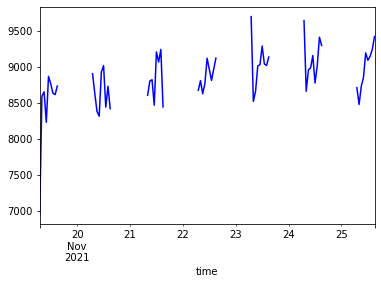

In [106]:
df_group_hour['weight_prediction_pixel_mean'].plot.line(color='blue')

In [11]:
# 11_19~11_25~ 데이터 로드
df_db = pd.read_csv("./query_result.csv")
df_db = df_db[['org_file_name', 'weight_prediction_pixel_mean', 'create_time']]
df_db.columns = ['org_file_name', 'db_weight_prediction_pixel_mean', 'create_time']

In [12]:
df_db['date'] = pd.to_datetime(df_db['create_time'])
query = (df_db['date']>='2021-11-25')
df_db = df_db.loc[query]

In [13]:
df_jetson = pd.read_csv("./jetson_11_25.csv")
df_jetson = df_jetson[['org_file_name', 'weight_prediction_pixel_mean']]
df_jetson.columns = ['org_file_name', 'jetson_weight_prediction_pixel_mean']

In [14]:
df_total = pd.merge(left = df_db, right = df_jetson, how = "inner", on = "org_file_name")
df_total = df_total[['org_file_name', 'db_weight_prediction_pixel_mean', 'jetson_weight_prediction_pixel_mean', 'create_time']]
df_total
df_total = df_total[~df_total.db_weight_prediction_pixel_mean.isnull()]
df_total = df_total[~df_total.jetson_weight_prediction_pixel_mean.isnull()]
#df_total['time'] = pd.to_datetime(df_total['create_time'], infer_datetime_format=False)

In [16]:
df_total['delta'] = df_total['db_weight_prediction_pixel_mean'] - df_total['jetson_weight_prediction_pixel_mean']

In [17]:
df_total.to_csv('compare_11_25.csv', index=False, columns=['org_file_name', 'db_weight_prediction_pixel_mean','jetson_weight_prediction_pixel_mean','delta', 'create_time'],encoding='utf-8')

In [10]:
df_total['timess'] = [ x[4] for x in df_total.org_file_name.str.split('_')]
df_total['No'] =     [ x[2] for x in df_total.org_file_name.str.split('_')]
df_total['moduleID'] = [ x[3] for x in df_total.org_file_name.str.split('_')]

df_total['timess'] = df_total.timess.astype(int)
df_total

OverflowError: Python int too large to convert to C long